<h2>Monte Carlo integration</h2>

The average value of a (continuous) function $\, f(x) \,$ can be written as

\begin{align*}
    \bar{f} &= \frac{1}{b - a} \int_{a}^{b} f(x) \, dx \\
    (b - a) \bar{f} &= \int_{a}^{b} f(x) \, dx \\
    (b - a) \frac{1}{n} \sum_{i=1}^{n} f(x_i) &\approx \int_{a}^{b} f(x) \, dx
\end{align*}

Note that the notation $\, \bar{f} \,$ refers to the average value of the function $\, f(x) \,$ over the interval $\, [a,b], \,$ which is a constant value (NOT a function of x). It represents the average height of the function of $\, f(x) \,$ over the interval $\, [a,b].\,$ The dependence on x is integrated out when computing the average. Therefore it is not appropriate to write $\, \bar{f}(x), \,$ as this would imply that $\, \bar{f} \,$ is a function of x, which it is not.

Note that in the Monte Carlo approx, in the sum $\, \sum_{i=1}^{n} f(x_i) \,$ each of the $\, x_i, \, \, i=1,...,n \,$ are random numbers sampled from the interval $\, [a,b]. \,$ This is the idea behind Monte Carlo integration.

So Monte Carlo integration says that the integral $\, \int_{a}^{b} f(x) \, dx \,$ can be approximated as $\, (b - a) \frac{1}{n} \sum_{i=1}^{n} f(x_i), \,$ where each of the $\, x_i \,$ are random samples drawn from a uniform distribution over $\, [a,b]. \,$

This approximation works because the sum $\, (b - a) \frac{1}{n} \sum_{i=1}^{n} f(x_i) \,$ is the sample mean of $\, f(x), \,$ and it converges to the true mean as $\, n \rightarrow \infty. \,$

<h3>Example 1</h3>

We're going to use Monte Carlo integration to approximate the integral

$$ \int_{0}^{\pi} sin(x) \, dx = \Big|_0^{\pi}-cos(x) = -cos(\pi) - (-cos(0)) = 2.$$

Let's see how close we can get.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    """
    The function to integrate
    (i.e., the function for which we want to approximate the area under its curve).
    """
    return np.sin(x)

- We want to evaluate `f` at the random points `xrand`.
- The final result will then be multiplied with the constant $\, (a - b) \frac{1}{n}. \,$

In [5]:
def monte_carlo_intgr(a, b, n):
    """
    Args:
        a: lower limit of integration
        b: upper limit of integration
        n: the number of random points to generate from U(a,b)
        
    Returns:
        An approximation of the integral introduced in Example 1.
    """
    # An array of n random numbers inside the integration limits
    xrand = np.random.uniform(low=a, high=b, size=n)
    result = 0
    for i in range(n):
        result += f(xrand[i])
    return (b-a) * (1/n) * result

In [6]:
integral_approximations = []
for i in range(1000):
    approx_integral = monte_carlo_intgr(a=0.0, b=np.pi, n=1000)
    integral_approximations.append(approx_integral)

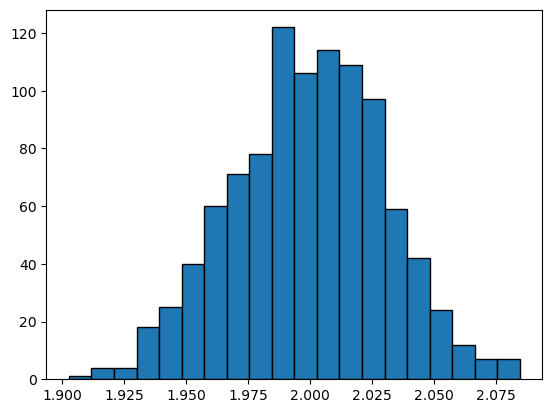

In [7]:
plt.hist(integral_approximations, bins=20, edgecolor='black');

- This histogram shows 1000 approximations of the integral $\, \int_{0}^{\pi} sin(x) \, dx. \,$

When we let $\, n \rightarrow \infty, \,$ the distribution should become narrower and approach the true value.

In [10]:
integral_approximations = []
for i in range(1000):
    approx_integral = monte_carlo_intgr(a=0.0, b=np.pi, n=100000)
    integral_approximations.append(approx_integral)

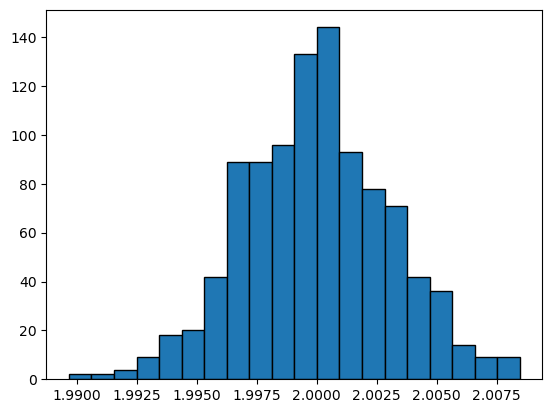

In [11]:
plt.hist(integral_approximations, bins=20, edgecolor='black');